# tree

타이타닉 예제

- Survied : 0 사망, 1 생존
- PClass : 선실등급
- SibSp : 동승한 형재자매나 배우자 수
- Parch : 동숭한 부모나 자녀 수
- Cabin : 선실번호
- embarked : 중간 정착 항구

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree, svm, linear_model

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/titianic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X_df = df.drop('Survived', axis=1)
y_df = df.Survived

## 전처리

In [5]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [6]:
# 의미 없는 칼럼 삭제
X_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [7]:
# 문자열 칼럼을 숫자형으로 변경
le = preprocessing.LabelEncoder()
X_df['Sex'] = le.fit_transform(X_df.Sex)

In [8]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int32  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.4+ KB


In [9]:
# 하나 남은 문자형 칼럼 Embarked을 one-hot 인코딩
X_df = pd.get_dummies(X_df)

In [10]:
# 나이 컬럼의 결측치 제거
X_df.Age.fillna(-99, inplace=True) #나이와 상관 없는 값으로 함

In [11]:
# 나이를 나이대로 변경
X_df['age_group'] = np.digitize(X_df.Age,[0,6,13,19,36,61])

In [12]:
X_df[['Age','age_group']].head()

,Age,age_group
0,22.0,4
1,38.0,5
2,26.0,4
3,35.0,4
4,35.0,4


In [13]:
X_df.drop('Age', axis=1, inplace=True)

## split


In [14]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_df, y_df)

## 학습 및 평가

In [15]:
model = tree.DecisionTreeClassifier()

In [16]:
model.fit(X_train, y_train)
    # 문자열 칼럼을 없애야 하고, 결측치도 없어야 학습 가능

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
model.score(X_test, y_test)

0.7713004484304933

## 학습모델 최적화

### 다른 모델

In [18]:
svc_model = svm.SVC(gamma='scale')
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

0.6233183856502242

In [19]:
logistic_model = linear_model.LogisticRegression(solver='lbfgs', max_iter=300)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_test, y_test)

0.7937219730941704

### 하이퍼파라미터 튜닝 & 교차 검증

In [20]:
params = {
    'max_depth':[2,4,6],
    'min_samples_split':[3,5,7],
    'splitter':['best','random']
}

In [21]:
gridsearch_model = model_selection.GridSearchCV(model, param_grid=params, cv=5)

In [22]:
gridsearch_model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 4, 6], 'min_samples_split': [3, 5, 7

In [23]:
gridsearch_model.best_params_

{'max_depth': 6, 'min_samples_split': 5, 'splitter': 'random'}

In [24]:
gridsearch_model.score(X_test, y_test)

0.7892376681614349

# 시각화

In [25]:
import graphviz

In [26]:
best_dt = gridsearch_model.best_estimator_

In [27]:
best_dt.feature_importances_

array([0.20230723, 0.52571325, 0.00845802, 0.03592752, 0.09094875,
       0.01492008, 0.        , 0.03292575, 0.0887994 ])

In [28]:
df_impt = pd.DataFrame({
    'feature': X_df.columns,
    'importance': best_dt.feature_importances_
})

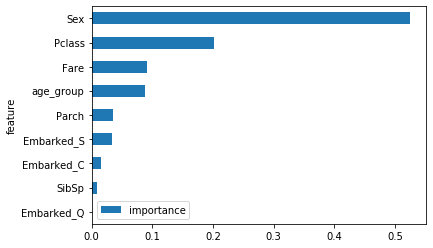

In [29]:
df_impt.set_index('feature').sort_values('importance').plot(kind='barh')
plt.show()

In [30]:
dot_data = tree.export_graphviz(best_dt)

In [31]:
graph = graphviz.Source(dot_data)

In [32]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [33]:
dot_data = tree.export_graphviz(best_dt,
                                feature_names=X_df.columns,
                                class_names=['Death', 'Survived'],
                                filled = True,
                                rounded = True
                                )
graph =graphviz.Source(dot_data)

In [34]:
graph

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [35]:
# pdf로 저장
graph.render('titanic_anlysis')

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'titanic_anlysis'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
dt1 = tree.DecisionTreeClassifier(max_depth=2)
dt2 = tree.DecisionTreeClassifier(max_depth=3, min_samples_split=100)

In [ ]:
dt1.fit(X_train, y_train)
dt2.fit(X_train, y_train)

In [ ]:
dot_data1 = tree.export_graphviz(dt1,
                                 feature_names=X_df.columns,
                                 class_names=['Death', 'Survived'],
                                 filled=True,
                                 rounded=True
                                 )
dot_data2 = tree.export_graphviz(dt2,
                                 feature_names=X_df.columns,
                                 class_names=['Death', 'Survived'],
                                 filled=True,
                                 rounded=True
                                 )
graph1 = graphviz.Source(dot_data1)
graph2 = graphviz.Source(dot_data2)

In [ ]:
graph1

In [ ]:
graph2

In [ ]:
graphviz.__file__

cf. 오류발생시

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH 

환경변수 PATH에 bin 와 bin/dot.ext 추가하기